<a href="https://colab.research.google.com/github/dadevansh/ML-projects/blob/master/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

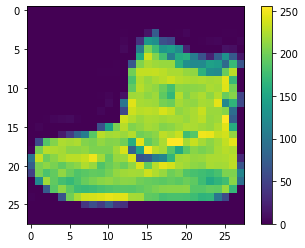

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images/255.0

test_images = test_images/255.0

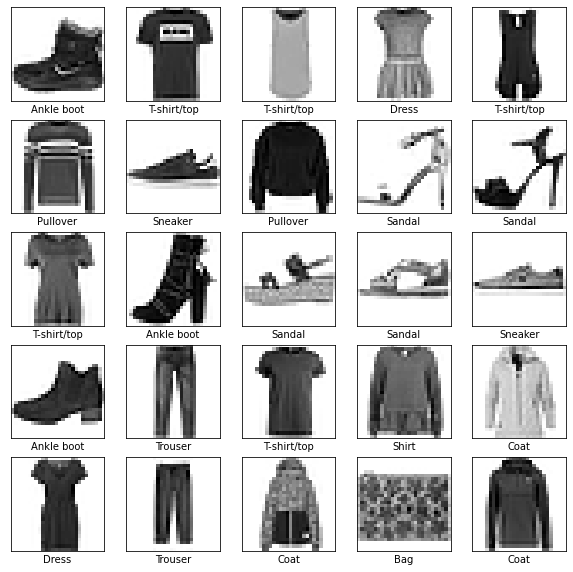

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [49]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(10)
])

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2307 - accuracy: 0.9143
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2218 - accuracy: 0.9180
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2166 - accuracy: 0.9179
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2095 - accuracy: 0.9214
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2048 - accuracy: 0.9221
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2004 - accuracy: 0.9249
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1922 - accuracy: 0.9277
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1867 - accuracy: 0.9305
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1847 - accuracy: 0.9314
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.178

In [53]:
test_loss, test_acc= model.evaluate(test_images,test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3403 - accuracy: 0.8899

Test accuracy: 0.8899000287055969


In [54]:
probability_model=tf.keras.Sequential([model,
                                       tf.keras.layers.Softmax()])

In [55]:
predictions=probability_model.predict(test_images)

In [56]:
predictions[0]

array([3.6921325e-12, 3.2516134e-13, 7.4274598e-13, 8.6176460e-21,
       1.9246046e-12, 1.6094269e-06, 8.9566260e-14, 1.5992144e-04,
       7.7202139e-13, 9.9983847e-01], dtype=float32)

In [57]:
np.argmax(prediction[0])

9

In [58]:
test_labels[0]

9

In [62]:
def plot_image(i,predictions_array, true_label,img):
  predictions_array, true_label, img= predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label= np.argmax(predictions_array)
  if predicted_label == true_label:
    color='blue'
  else:
    color='red'
  
  plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],100*np.max(predictions_array),
                                     class_names[true_label]),color=color)
  

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


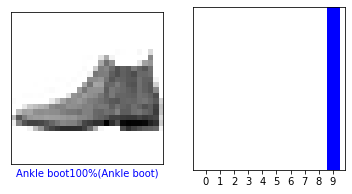

In [64]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

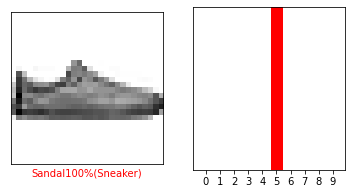

In [65]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

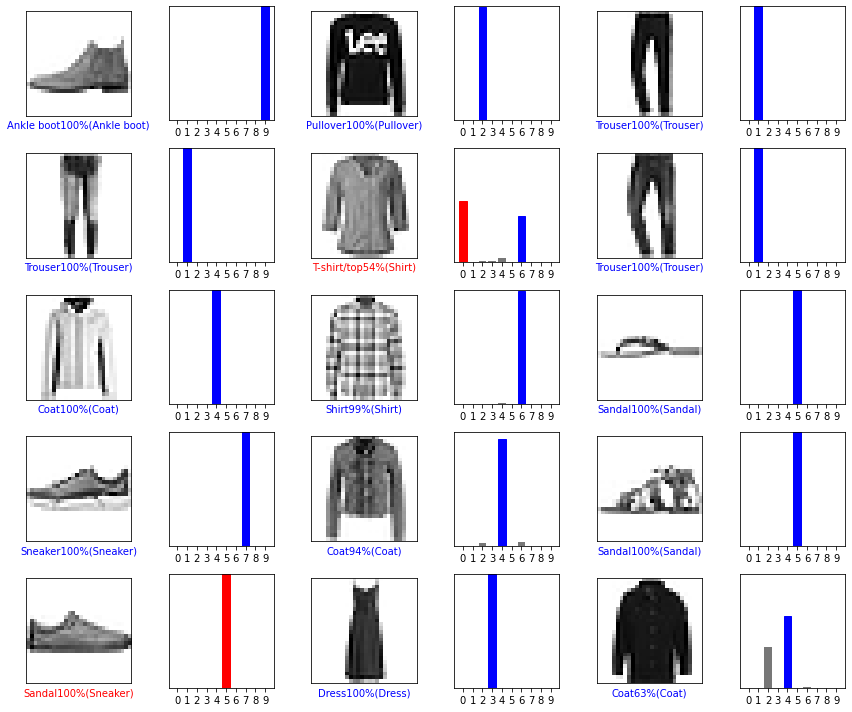

In [67]:
num_rows=5
num_cols=3
num_images= num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions[i], test_labels, test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [71]:
img=test_images[1]
print(img.shape)

(28, 28)


In [72]:
img=(np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [73]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.2316044e-04 4.6251794e-14 9.9866331e-01 7.4672778e-14 9.8917796e-04
  5.5818869e-13 2.4351835e-05 1.5263322e-24 1.1809762e-11 2.8552978e-16]]


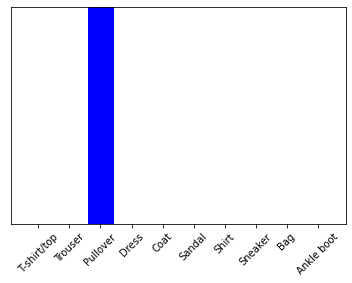

In [75]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [76]:
np.argmax(predictions_single[0])

2